# CMP7005 – From Data to Application Development

**Beijing Multi-Site Air Quality Analysis**

This notebook performs Exploratory Data Analysis (EDA) and predictive modelling on Beijing air quality data for four monitoring stations. The final goal is to develop a GUI and submit the project for CMP7005 reassessment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load data
stations = {
    "Dongsi": "data/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Huairou": "data/PRSA_Data_Huairou_20130301-20170228.csv",
    "Changping": "data/PRSA_Data_Changping_20130301-20170228.csv",
    "Guanyuan": "data/PRSA_Data_Guanyuan_20130301-20170228.csv"
}

dfs = []
for name, path in stations.items():
    df = pd.read_csv(path)
    df["station"] = name
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# Create datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])


## Basic Information & Preprocessing

In [2]:
# Drop rows with missing important values
df.dropna(subset=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"], inplace=True)

# Drop unnecessary columns
df.drop(columns=["No", "wd"], inplace=True)

# Overview
print("Shape:", df.shape)
print(df.dtypes)
df.describe()


Shape: (127459, 17)
year                 int64
month                int64
day                  int64
hour                 int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
TEMP               float64
PRES               float64
DEWP               float64
RAIN               float64
WSPM               float64
station             object
datetime    datetime64[ns]
dtype: object


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459.000000,127459
mean,2014.738371,6.498654,15.694992,11.548459,77.119431,101.554613,15.367993,47.063858,1191.606250,57.314727,13.228564,1010.106076,2.177768,0.064622,1.771685,2015-03-28 09:25:38.979593984
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-19.900000,982.400000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,3.000000,8.000000,6.000000,20.000000,35.000000,2.000000,22.000000,500.000000,13.000000,3.000000,1001.800000,-9.300000,0.000000,0.900000,2014-04-20 18:00:00
50%,2015.000000,7.000000,16.000000,12.000000,53.000000,79.000000,7.000000,39.000000,900.000000,45.000000,14.100000,1009.700000,2.600000,0.000000,1.400000,2015-04-06 05:00:00
75%,2016.000000,10.000000,23.000000,18.000000,108.000000,141.000000,19.000000,65.000000,1500.000000,81.000000,22.900000,1018.200000,14.800000,0.000000,2.200000,2016-03-16 07:30:00
max,2017.000000,12.000000,31.000000,23.000000,695.000000,993.000000,315.000000,270.000000,10000.000000,1071.000000,41.400000,1042.000000,29.100000,72.500000,12.900000,2017-02-28 23:00:00
std,1.153594,3.460216,8.791390,6.944172,77.670151,89.485481,21.190307,32.932600,1099.385982,56.054532,11.465651,10.398570,13.803446,0.831048,1.247063,NaN


## Visualisation 1: PM2.5 Yearly Trend

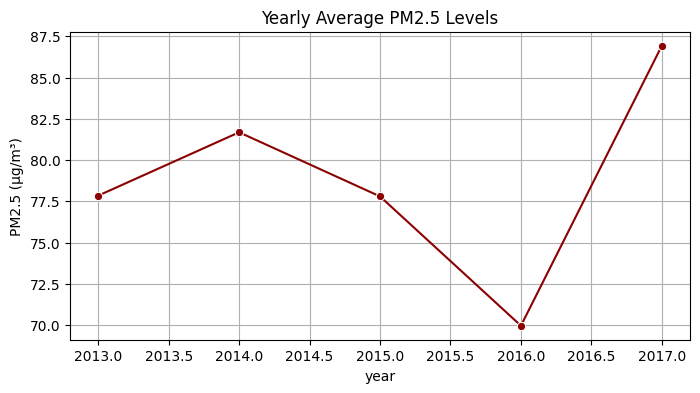

In [3]:
df['year'] = df['datetime'].dt.year
yearly_pm25 = df.groupby('year')['PM2.5'].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_pm25.index, y=yearly_pm25.values, marker="o", color='darkred')
plt.title("Yearly Average PM2.5 Levels")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


## Visualisation 2: PM2.5 Boxplot by Station

C:\Users\sakhi\AppData\Local\Temp\ipykernel_9824\2363481812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="station", y="PM2.5", data=df, palette="Set2")


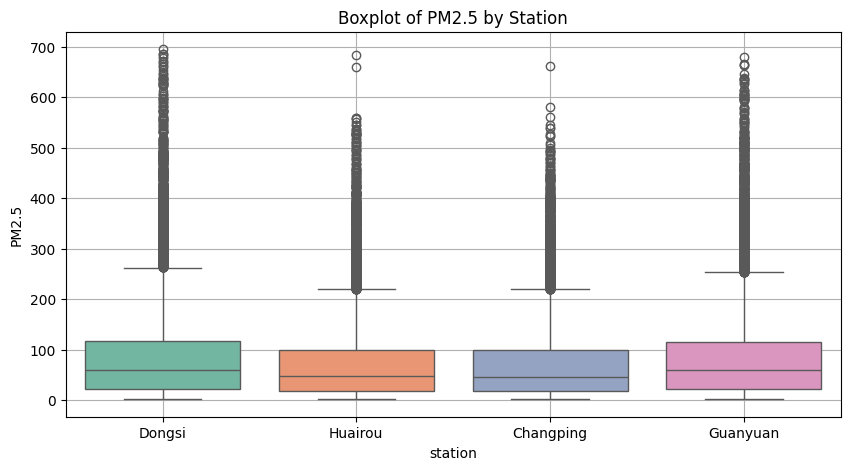

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="station", y="PM2.5", data=df, palette="Set2")
plt.title("Boxplot of PM2.5 by Station")
plt.grid(True)
plt.show()


## Visualisation 3: Average Pollutants per Station

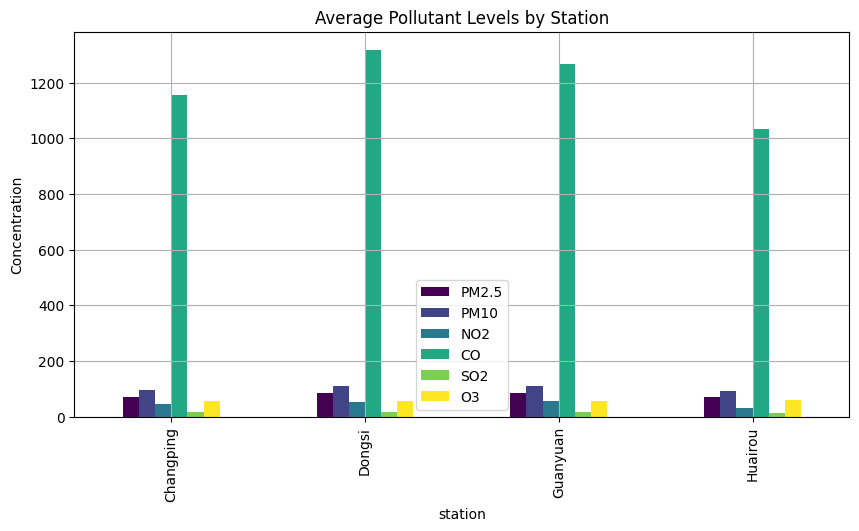

In [5]:
avg_pollutants = df.groupby("station")[["PM2.5", "PM10", "NO2", "CO", "SO2", "O3"]].mean()
avg_pollutants.plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.title("Average Pollutant Levels by Station")
plt.ylabel("Concentration")
plt.grid(True)
plt.show()


## Visualisation 4: Wind Speed vs PM2.5

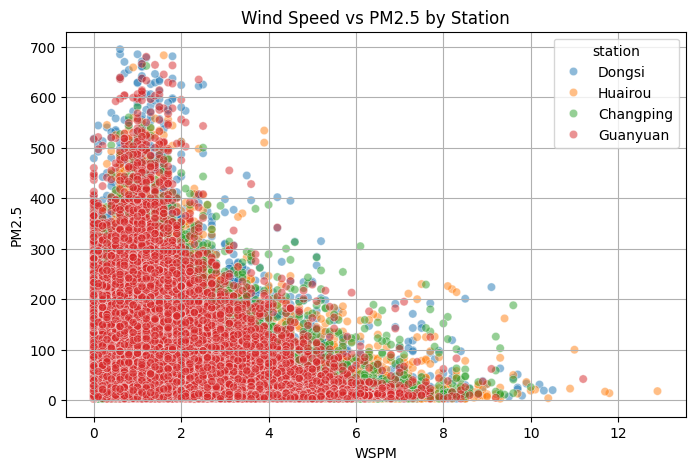

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="WSPM", y="PM2.5", hue="station", alpha=0.5)
plt.title("Wind Speed vs PM2.5 by Station")
plt.grid(True)
plt.show()


## Predictive Modelling: PM2.5 Regression

In [9]:
# Ensure proper imports at the top of your notebook
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate your model
y_pred = model.predict(X_test)

# Print performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.8594
RMSE: 28.7488


In [ ]:
# Save cleaned dataset for GUI use (app.py)
df.reset_index().to_csv("data/cleaned_data.csv", index=False)
print("Cleaned data saved to: data/cleaned_data.csv")


✅ Cleaned data saved to: data/cleaned_data.csv
